#                    Exploratory Data Analysis of Haberman Dataset

##  Haberman Dataset 

* The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [163]:
import pandas as pd
import numpy as np
import warnings 

In [164]:
df=pd.read_csv('haberman.csv')

# Objective:
* To check whether the given the patient survived 5 years or longer (or) the patient died within 5 years.

## Attribute Information: 
* Age of patient at time of operation (numerical)
* Patient's year of operation (year - 1900, numerical)
* Number of positive axillary nodes detected (numerical)
* Survival status (class attribute) - 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year



In [165]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


** Observations:**
* age, year, nodes - Attributes(Cannot say whether they can be selected as features or not for the model as of now) <br>
* status - Target label 

In [166]:
df.shape

(306, 4)

* Total records: 306

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


** Observations:**
* Total Null values - 0 <br>
* All values in all the features are of type int - ** No conversions required ** 

In [168]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


## Observations from mean and quartiles:<br>
* age - we can say that most of the samples lies in the first half, as the mean is little nearer to the min value<br>
* year - Looks fine<br>
* nodes - min and mean are nearer where as max is too far, which says that there may be few outliers <br>
<br>

## Observations from std and percentiles:<br>
* age - population is fairly distributed<br>
* year - has least std which means more number of samples are around the mean.<br>
* nodes - Tells that there are outlier of about roughly 25% of population. ** <br>

##### The target variable 'status' is evenly distributed <br>

**NOTE: All these inferences are not final. **

In [169]:
df.groupby('status')['status'].count()
#df['status'].value_counts() --> Gets the same result

status
1    225
2     81
Name: status, dtype: int64

**Observations:**
* The class is imbalanced as 75%(approx.) of population is 1 and 25%(approx.) is about 2 

# Scatter plots (2D) :

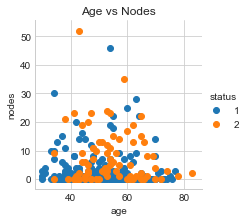

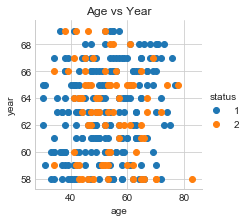

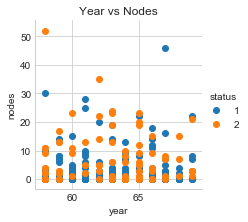

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore") 
plt.close()
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status", size=3).map(plt.scatter,"age", "nodes").add_legend()
plt.title('Age vs Nodes')
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status", size=3).map(plt.scatter,"age", "year").add_legend()
plt.title('Age vs Year')
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(df, hue="status", size=3).map(plt.scatter,"year", "nodes").add_legend()
plt.title('Year vs Nodes')
plt.show()

** Observations:**
*  All the features are mostly overlapped with other features. Hard to interpret due to overlapping 

### Let's check how densly the ages of patients are clustered based on whether they are survived or not:

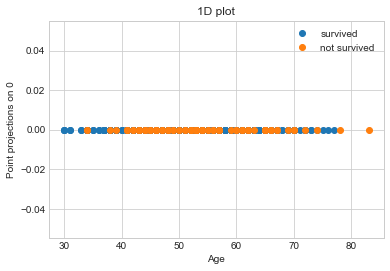

In [171]:
df_survived=df.loc[df["status"]==1]
df_not_survived=df.loc[df["status"]==2]

plt.plot(df_survived['age'], np.zeros_like(df_survived['age']), 'o',label='survived')
plt.xlabel('Age')
plt.ylabel('Point projections on 0')
plt.plot(df_not_survived['age'], np.zeros_like(df_not_survived['age']), 'o',label='not survived')
plt.title('1D plot')
plt.legend()
plt.show()

#We projected all the points on 0 on y-axis so as to see how densly they are clustered.

** Observations**:
* People of age (40-60) are mostly survived but this can't be guaranteed, as the orange plots might have dominated blue plots under it.

# Pair Plot(3D):
* We use this plot to visualize the three attributes at the same time. 

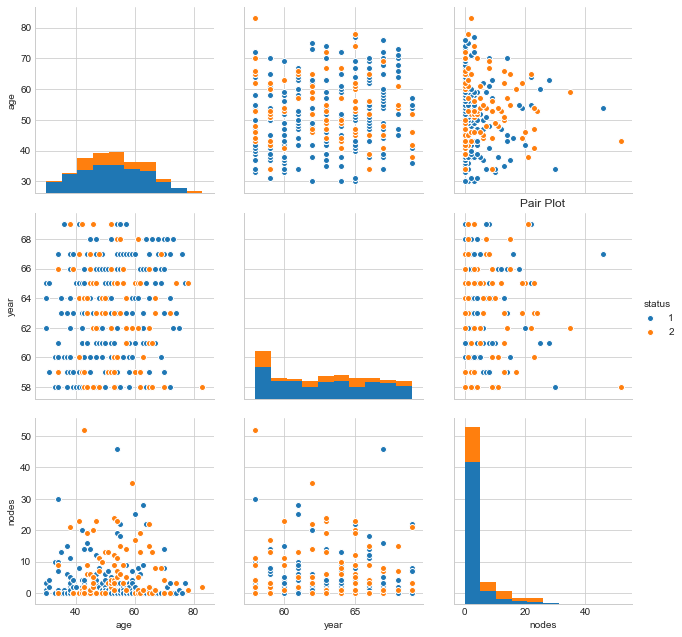

In [172]:
#PairPlot
sns.set_style("whitegrid")
sns.pairplot(df, hue="status",vars=['age','year','nodes'], size=3)
plt.title('Pair Plot')
plt.show()

** Observations**:
* Due to these overlappings, we can't conclude anything. So, let's try to infer from pdfs or cdfs.

# PDFs and CDFs:
* PDF- Probability Density Function
* CDF- Cumulative Density Function
* These two functions helps us to determine the how much percentage of observations lie in a given range(approx.) and what percentage of observations are covered at a particular point.

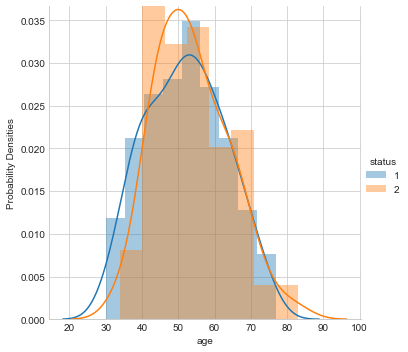

In [173]:
#PDFs of different features with respect to status 

sns.FacetGrid(df, hue="status", size=5).map(sns.distplot,"age").add_legend()
plt.ylabel('Probability Densities')
plt.show()

**Observations:**
* These two curves are mostly overlapped.
* For a sample in the given population, we can construct a model in the given way:<br>
if age<=35<br>
    survives>5 years<br>
else if age>=75 <br>
    dies within 5 years     
else<br> 
    Difficult to interpret.

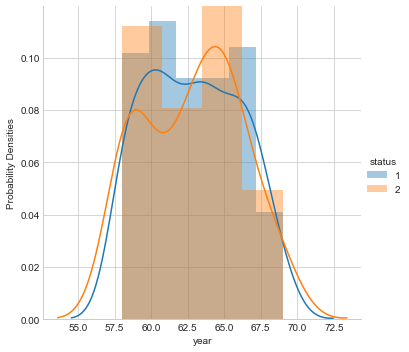

In [174]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "year").add_legend()
plt.ylabel('Probability Densities')
plt.show()

** Observations**:
* Difficult to interpret these curves as they completely overlap

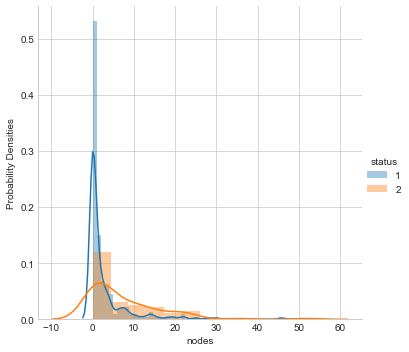

In [175]:
sns.FacetGrid(df, hue="status", size=5).map(sns.distplot, "nodes").add_legend()
plt.ylabel('Probability Densities')
plt.show()

** Observations:**
* From this curve, we can create a small model such that: <br>
if nodes==0:<br>
    patient survives>5 years<br>
else<br>
    may or maynot survive more than 5 years

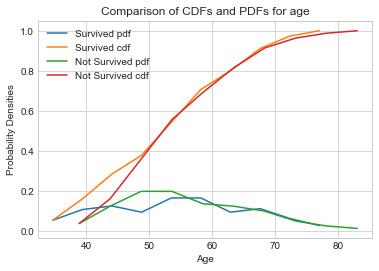

In [176]:
plt.close()
counts, bin_edges = np.histogram(df_survived['age'], bins=10,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
#print(pdf)
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Survived pdf')
plt.plot(bin_edges[1:],cdf,label='Survived cdf')
plt.xlabel('Age')
plt.ylabel('Probability Densities')
plt.legend()


counts, bin_edges = np.histogram(df_not_survived['age'], bins=10,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Not Survived pdf')
plt.plot(bin_edges[1:],cdf,label='Not Survived cdf')
plt.legend()
plt.title('Comparison of CDFs and PDFs for age')
plt.show()

** Observations:**
* Not much additional information is seen as pdf's and cdf's overlap.<br>
* if age<=35(approx)<br>
    survives more than 5 years<br>
else<br>
    may or may not survive more than 5 years<br>

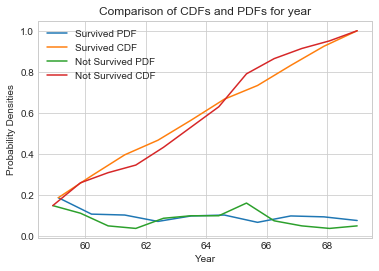

In [177]:
plt.close()
counts, bin_edges = np.histogram(df_survived['year'], bins=10,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Survived PDF');
plt.plot(bin_edges[1:],cdf,label='Survived CDF')
plt.xlabel('Year')
plt.ylabel('Probability Densities')
plt.legend()

counts, bin_edges = np.histogram(df_not_survived['year'], bins=12,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Not Survived PDF')
plt.plot(bin_edges[1:],cdf,label='Not Survived CDF')
plt.legend()
plt.title('Comparison of CDFs and PDFs for year')
plt.show()

** Observations**:
* These curves almost follow the same path even if I change the bins.

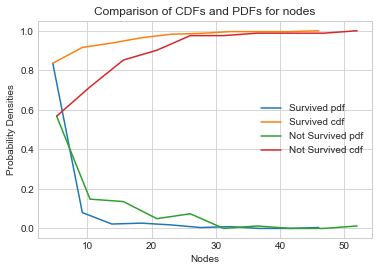

In [178]:
plt.close()
counts, bin_edges = np.histogram(df_survived['nodes'], bins=10,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Survived pdf');
plt.plot(bin_edges[1:],cdf,label='Survived cdf')
plt.xlabel('Nodes')
plt.ylabel('Probability Densities')
plt.legend()
plt.title('Comparison of CDFs and PDFs for nodes')


counts, bin_edges = np.histogram(df_not_survived['nodes'], bins=10,density = True)
#print(counts)
#print(bin_edges)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Not Survived pdf')
plt.plot(bin_edges[1:],cdf,label='Not Survived cdf')
plt.legend()

plt.show()

** Observations**:
* We can see that most of the deaths and survivals are around '2' nodes(80% survival cases and 60% death cases).

# Mean, Quantiles, Percentiles, IQR 

In [179]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(df_survived["age"]))
print(np.median(df_not_survived["age"]))

print(np.median(df_survived["year"]))
print(np.median(df_not_survived["year"]))

print(np.median(df_survived["nodes"]))
print(np.median(df_not_survived["nodes"]))

print("\nQuantiles:")
print(np.percentile(df_survived["age"],np.arange(0, 100, 25)))
print(np.percentile(df_not_survived["age"],np.arange(0, 100, 25)))

print(np.percentile(df_survived["year"],np.arange(0, 100, 25)))
print(np.percentile(df_not_survived["year"],np.arange(0, 100, 25)))

print(np.percentile(df_survived["nodes"],np.arange(0, 100, 25)))
print(np.percentile(df_not_survived["nodes"],np.arange(0, 100, 25)))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_survived["age"]))
print(robust.mad(df_not_survived["age"]))

print(robust.mad(df_survived["year"]))
print(robust.mad(df_not_survived["year"]))

print(robust.mad(df_survived["nodes"]))
print(robust.mad(df_not_survived["nodes"]))


Medians:
52.0
53.0
63.0
63.0
0.0
4.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[58. 60. 63. 66.]
[58. 59. 63. 65.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Median Absolute Deviation
13.343419966550417
11.860817748044816
4.447806655516806
4.447806655516806
0.0
5.930408874022408


** Observations:**
* From the above data, almost all the values of 'survived and not survive patients' are same, **except the nodes of survived patients are 0 mostly(From the MAD of survived-last but one value).**

# Box plots and Violin plots

* In a nutshell, Box plots gives the information about the quartiles of the observations where as Violin plot is the combination of Box plot and Histogram.  

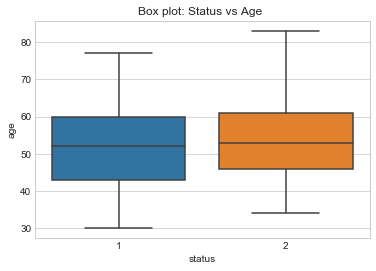

In [180]:
sns.boxplot(x='status',y='age', data=df)
plt.title('Box plot: Status vs Age ')
plt.show()

** Observations **:
* Most of the patients were diagnosied with cancer are in the age 40-60

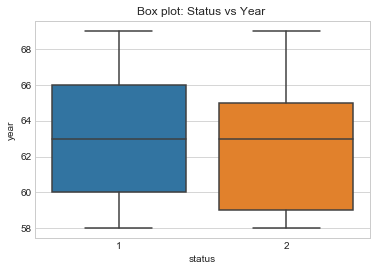

In [181]:
sns.boxplot(x='status',y='year', data=df)
plt.title('Box plot: Status vs Year ')
plt.show()

** Observations:**
* Most of the operations took in the years 59-66.

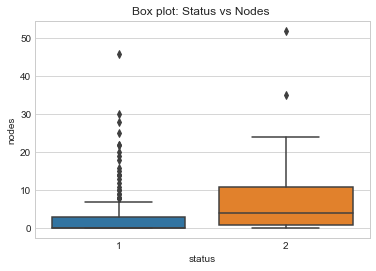

In [182]:
sns.boxplot(x='status',y='nodes', data=df)
plt.title('Box plot: Status vs Nodes ')
plt.show() 

**Observations:**
* Patients with nodes > 10(approx.) survived more than 5 years.
* Patient with nodes 2-10 are mostly dead with in 5 years

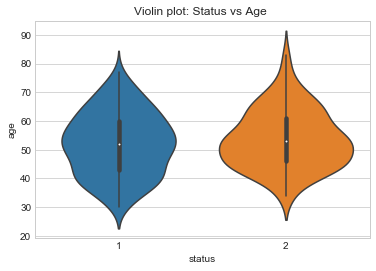

In [183]:
sns.violinplot(x="status", y="age", data=df, size=5)
plt.title('Violin plot: Status vs Age ')
plt.show()

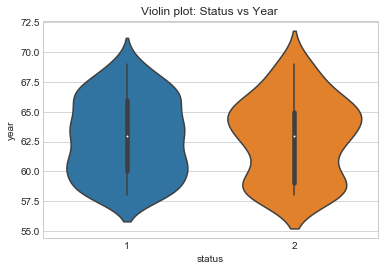

In [184]:
sns.violinplot(x="status", y="year", data=df, size=5)
plt.title('Violin plot: Status vs Year ')
plt.show()

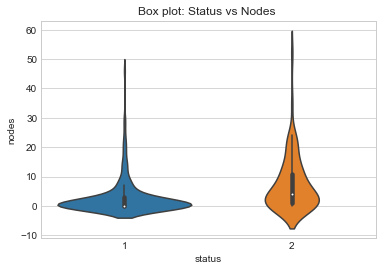

In [185]:
sns.violinplot(x="status", y="nodes", data=df, size=5)
plt.title('Box plot: Status vs Nodes ')
plt.show()

** Observations**:
* These violin plots gives the same information that we had already inferred from the above plots.

# Final Note:
* From the above observation, age and nodes should be definitely selected as **features** for the model.<br>
* Logically, year of operation doesn't contribute anything to cancer. <br>
* But in certain range of years(59-66), many operations took place which have both survivals and dead.<br>
* May be in an imaginative way, the doctors at those years might be capable of doing the successful operations(Assumption).<br>
* So, I will consider the year as a Feature too and will check the training and testing accuracy including and excluding it.<br>